In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
import uproot4 as up

v_keys = ["w/ IBD", "w/o IBD"]
v_path = ["/afs/ihep.ac.cn/users/l/luoxj/TestPSD_offline/jobs_ana/root/atmfit_",
          "/afs/ihep.ac.cn/users/l/luoxj/TestPSD_offline/TestPSDTool/user_atm_"]
v_key_tree = ["psdtree", "PSD"]
v_id = range(1,3000)
# v_id = [10]
dir_tree = {}
dir_index = {}

v_PSD_fake_IBD = []
import tqdm
from copy import copy
for id in tqdm.tqdm(v_id):
    # if True:
    try:
        for i,key in enumerate(v_keys):
            dir_PSD_tree = {}
            tree_PSD = up.open(f"{v_path[i]}{id}.root:{v_key_tree[i]}")
            R3 = np.array(tree_PSD["r3_tag"])
            index = (R3<4096)
            for key_tree in tree_PSD.keys():
                dir_PSD_tree[key_tree] = np.array(tree_PSD[key_tree])[index]
            dir_tree[key] = copy(dir_PSD_tree)
            dir_index[key] = index

        for i in range(len(dir_tree["w/ IBD"]["r3_tag"])):
            if dir_tree["w/ IBD"]["Eqen_o"][i]>31 or  dir_tree["w/ IBD"]["Eqen_o"][i]<11:
                continue
            index_IBD = (dir_tree["w/o IBD"]["r3_tag"] == dir_tree["w/ IBD"]["r3_tag"][i])
            # print(index_IBD)
            # print(dir_tree["w/o IBD"]["r3_tag"][index_IBD])
            # print(dir_tree["w/o IBD"]["E_rec"][index_IBD])
            v_PSD_fake_IBD.extend(dir_tree["w/o IBD"]["psdVal"][index_IBD])
            # print(v_PSD_fake_IBD)
    except :
        continue


# print(dir_tree["w/ IBD"]["r3_tag"])
# print(dir_tree["w/o IBD"]["r3_tag"])
# Counter(index_IBD)
# print(index_IBD)

100%|██████████| 2999/2999 [12:32<00:00,  3.98it/s]


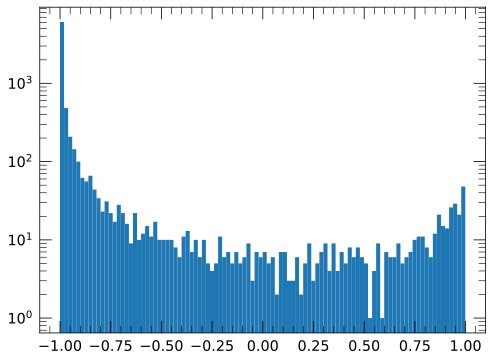

In [2]:
plt.hist(v_PSD_fake_IBD, bins=100)
plt.semilogy()
np.save("tmp_atm.pnz", np.array(v_PSD_fake_IBD))
